In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import os

In [2]:
# Read the raw dataset
df = pd.read_csv('C:/Users/hlina/solar-challenge-week1/data/benin-malanville.csv')

In [3]:
# Summary statistics
print("Summary statistics:")
print(df.describe())

Summary statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0

In [4]:
# Missing values count
missing_counts = df.isna().sum()
print("\nMissing values count:")
print(missing_counts)


Missing values count:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [5]:
# Columns with more than 5% missing values
total_rows = len(df)
missing_percent = (missing_counts / total_rows) * 100
cols_over_5pct = missing_percent[missing_percent > 5]
print("\nColumns with more than 5% missing values:")
print(cols_over_5pct)



Columns with more than 5% missing values:
Comments    100.0
dtype: float64


In [6]:
# Key columns for outlier and missing value handling
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']


In [7]:
# Drop rows with NaN temporarily to compute z-scores
df_z = df[key_cols].dropna()

# Compute Z-scores
z_scores = np.abs(zscore(df_z))
mask = (z_scores < 3).all(axis=1)

In [8]:
# Create cleaned DataFrame by removing outliers
df_clean = df.loc[df_z.index[mask]].copy()


In [9]:
# Fill missing values in key columns with the median
for col in key_cols:
    if col in df_clean.columns:
        median_value = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median_value)


In [10]:
# Ensure the output directory exists
os.makedirs("../data", exist_ok=True)

In [1]:
# Export cleaned DataFrame
df_clean.to_csv("../data/togo_clean.csv", index=False)
print("File saved to ../data/benin_clean.csv")

NameError: name 'df_clean' is not defined

In [12]:
# Ensure Timestamp column is datetime
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'], errors='coerce')
df_clean = df_clean.dropna(subset=['Timestamp'])  # drop rows with invalid dates

In [13]:
# Time-based features
df_clean['Month'] = df_clean['Timestamp'].dt.month
df_clean['Hour'] = df_clean['Timestamp'].dt.hour

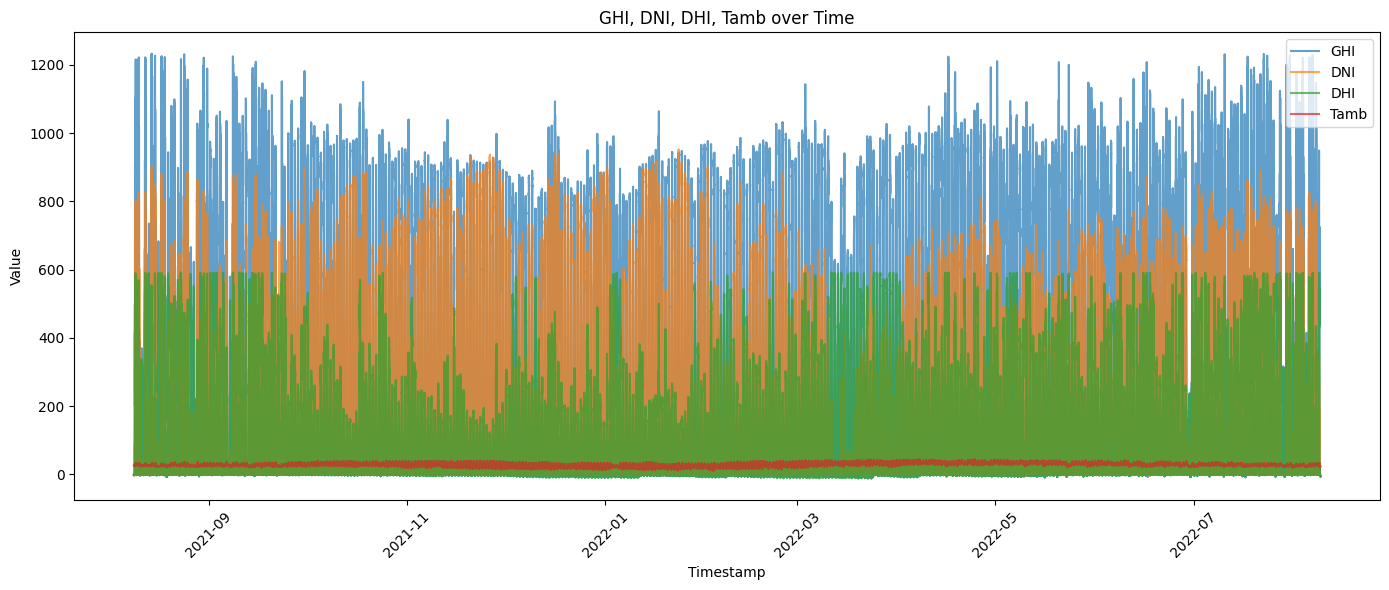

In [14]:
# Plot GHI, DNI, DHI, Tamb over time
plt.figure(figsize=(14, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df_clean['Timestamp'], df_clean[col], label=col, alpha=0.7)

plt.legend(loc='upper right')  # specify location manually
plt.title('GHI, DNI, DHI, Tamb over Time')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

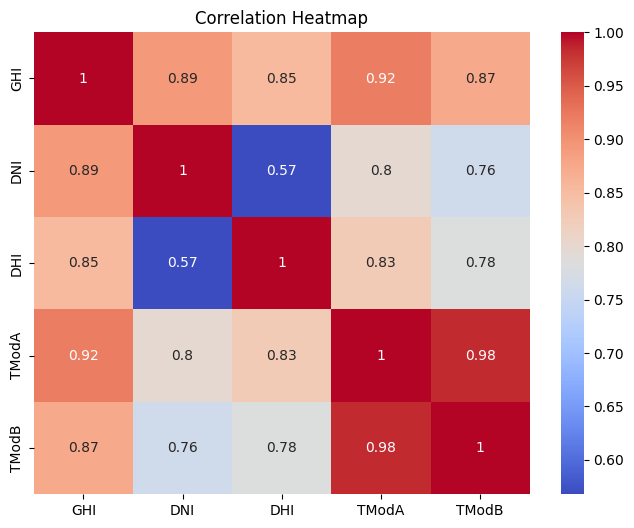

In [15]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df_clean[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

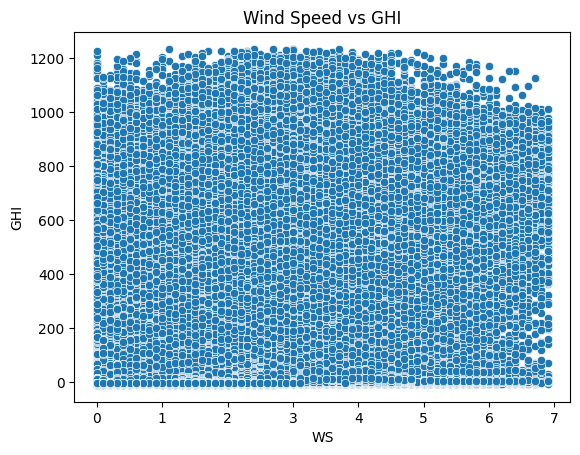

In [16]:
# WS vs GHI
sns.scatterplot(data=df_clean, x='WS', y='GHI')
plt.title('Wind Speed vs GHI')
plt.show()

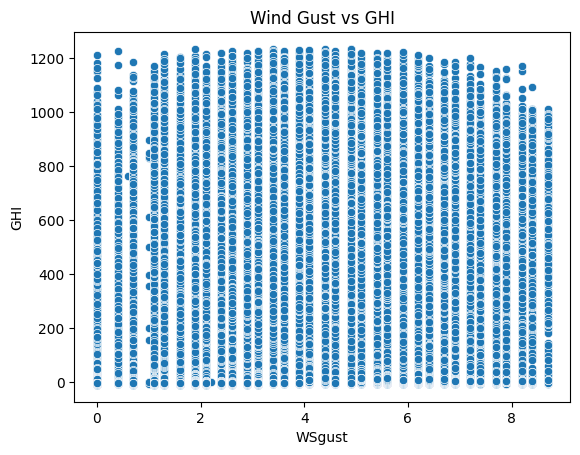

In [17]:
# WSgust vs GHI
sns.scatterplot(data=df_clean, x='WSgust', y='GHI')
plt.title('Wind Gust vs GHI')
plt.show()

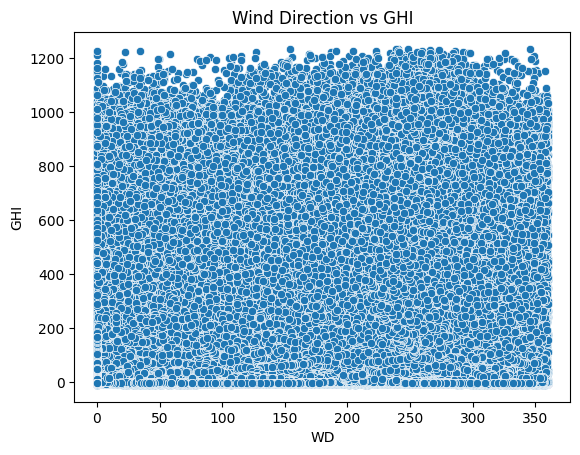

In [18]:
# WD vs GHI
sns.scatterplot(data=df_clean, x='WD', y='GHI')
plt.title('Wind Direction vs GHI')
plt.show()

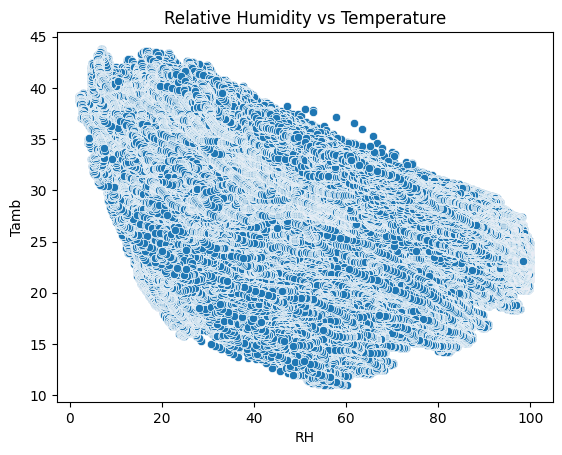

In [19]:
# RH vs Tamb
sns.scatterplot(data=df_clean, x='RH', y='Tamb')
plt.title('Relative Humidity vs Temperature')
plt.show()

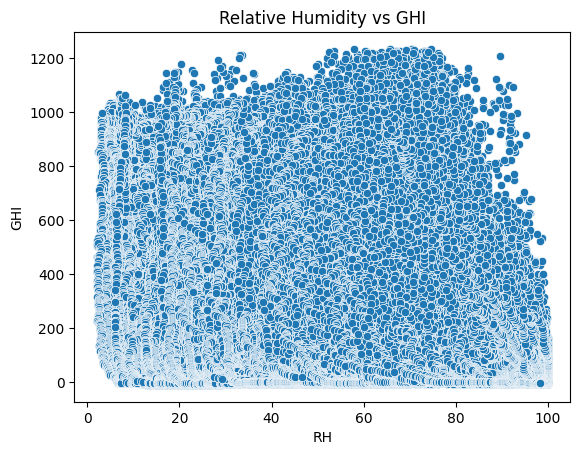

In [20]:
# RH vs GHI
sns.scatterplot(data=df_clean, x='RH', y='GHI')
plt.title('Relative Humidity vs GHI')
plt.show()

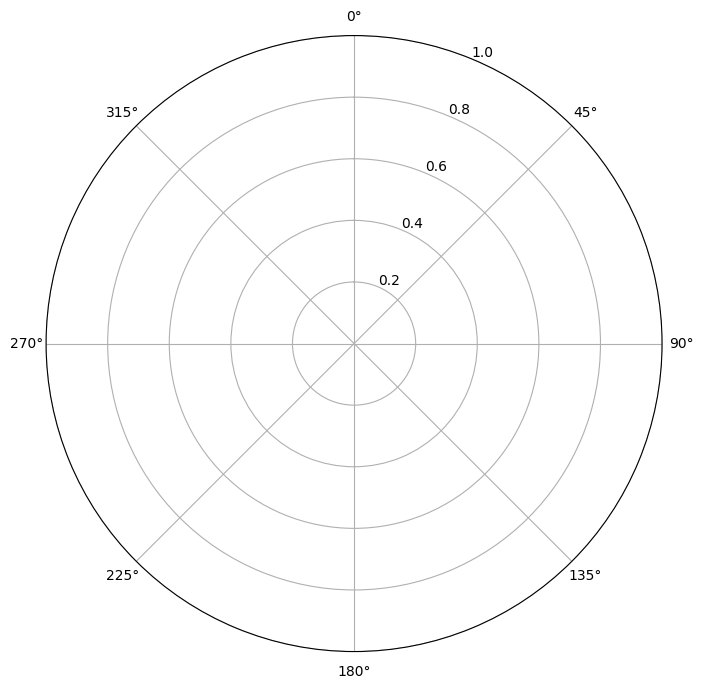

In [21]:
# Convert WD from degrees to radians
wd_rad = np.radians(df_clean['WD'])

# Create wind rose-style polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_theta_zero_location("N")  # North at top
ax.set_theta_direction(-1)  # Clockwise

In [ ]:
# Convert WD (wind direction in degrees) to radians
wd_rad = np.radians(df_clean['WD'])

# Create a polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))

# Plot wind speed vs. wind direction
ax.bar(wd_rad, df_clean['WS'], width=np.radians(10), bottom=0, alpha=0.5)

# Customize the plot
ax.set_theta_zero_location('N')  # Set 0 degrees to North
ax.set_theta_direction(-1)       # Clockwise direction
ax.set_title('Wind Rose: Wind Speed vs. Wind Direction')

plt.show()

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['GHI'], bins=30, kde=True)
plt.title('Distribution of GHI')

plt.subplot(1, 2, 2)
sns.histplot(df_clean['WS'], bins=30, kde=True, color='orange')
plt.title('Distribution of Wind Speed')

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df_clean)
plt.title('Relative Humidity vs Temperature (Tamb)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df_clean, color='green')
plt.title('Relative Humidity vs Solar Radiation (GHI)')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
bubble_size = df_clean['RH'] * 2  # scale bubble size
sns.scatterplot(x='GHI', y='Tamb', size=bubble_size, data=df_clean, alpha=0.6, legend=False)

plt.title('Bubble Chart: GHI vs Tamb (Bubble Size = RH)')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.tight_layout()
plt.show()

